In [1]:
# generate_kara_rect_masks.py
# ----------------------------------
# Crea active_grid_cell_mask_01‑12.npy limitate al rettangolo voluto.

import os
import numpy as np
from pyproj import Transformer
from icenet.data.sic.mask import Masks

# --- parametri --------------------------------------------------------------
hemi      = "north"                                  # emisfero
mask_dir  = f"./data/masks/{hemi}/masks"             # cartella IceNet
lon_min, lon_max =  60.0, 105.0                      # °E
lat_min, lat_max =  68.0,  82.0                      # °N
# ----------------------------------------------------------------------------

os.makedirs(mask_dir, exist_ok=True)

In [2]:

# 1 · griglia centri‑cella EASE‑2 North (433 000 m / passo 25 km → 432 px)
shape = (432, 432)
step  = 25_000
cols  = np.arange(shape[1]) - shape[1]/2 + 0.5
rows  = np.arange(shape[0]) - shape[0]/2 + 0.5
x_coords =  cols * step                            # metri
y_coords = -rows * step                            # inverti asse y
xc, yc   = np.meshgrid(x_coords, y_coords, indexing="xy")

In [3]:

# 2 · converte tutti i punti in lat/lon (EPSG:6931 → WGS84)
transform = Transformer.from_crs("EPSG:6931", "EPSG:4326", always_xy=True)
lon, lat  = transform.transform(xc, yc)            # array 432×432

# 3 · rettangolo Kara: mask True se dentro i limiti
rect_mask = (
    (lon >= lon_min) & (lon <= lon_max) &
    (lat >= lat_min) & (lat <= lat_max)
)

In [6]:

# 4 · interseca con le maschere mensili base e salva
m = Masks(north=True, south=False)                 # solo per caricare path
for mm in range(1, 13):
    p = os.path.join(mask_dir, f"active_grid_cell_mask_{mm:02d}.npy")
    base = np.load(p)
    pout = os.path.join(mask_dir, f"active_grid_cell_mask_{mm:02d}_rect.npy")
    np.save(pout, base & rect_mask)

print("Nuove maschere rettangolari salvate in", mask_dir)


Nuove maschere rettangolari salvate in data/masks/north/masks


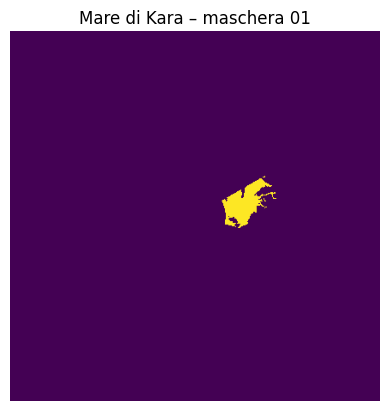

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

# ⇩⇩  METTI QUI IL PERCORSO CORRETTO  ⇩⇩
mask_dir = "data/masks/north/masks"

for mm in range(1, 2):
    mask_path = os.path.join(mask_dir, f"active_grid_cell_mask_{mm:02d}_rect.npy")
    if not os.path.isfile(mask_path):
        print(f"Non trovato: {mask_path}")
        continue

    mask = np.load(mask_path)

    # figura singola, nessun subplot
    plt.figure()
    plt.imshow(mask, origin="lower")
    plt.title(f"Mare di Kara – maschera {mm:02d}")
    plt.axis("off")
    plt.show()

In [8]:
np.count_nonzero(mask == 1)

1575